Formula 1 Race Data 11

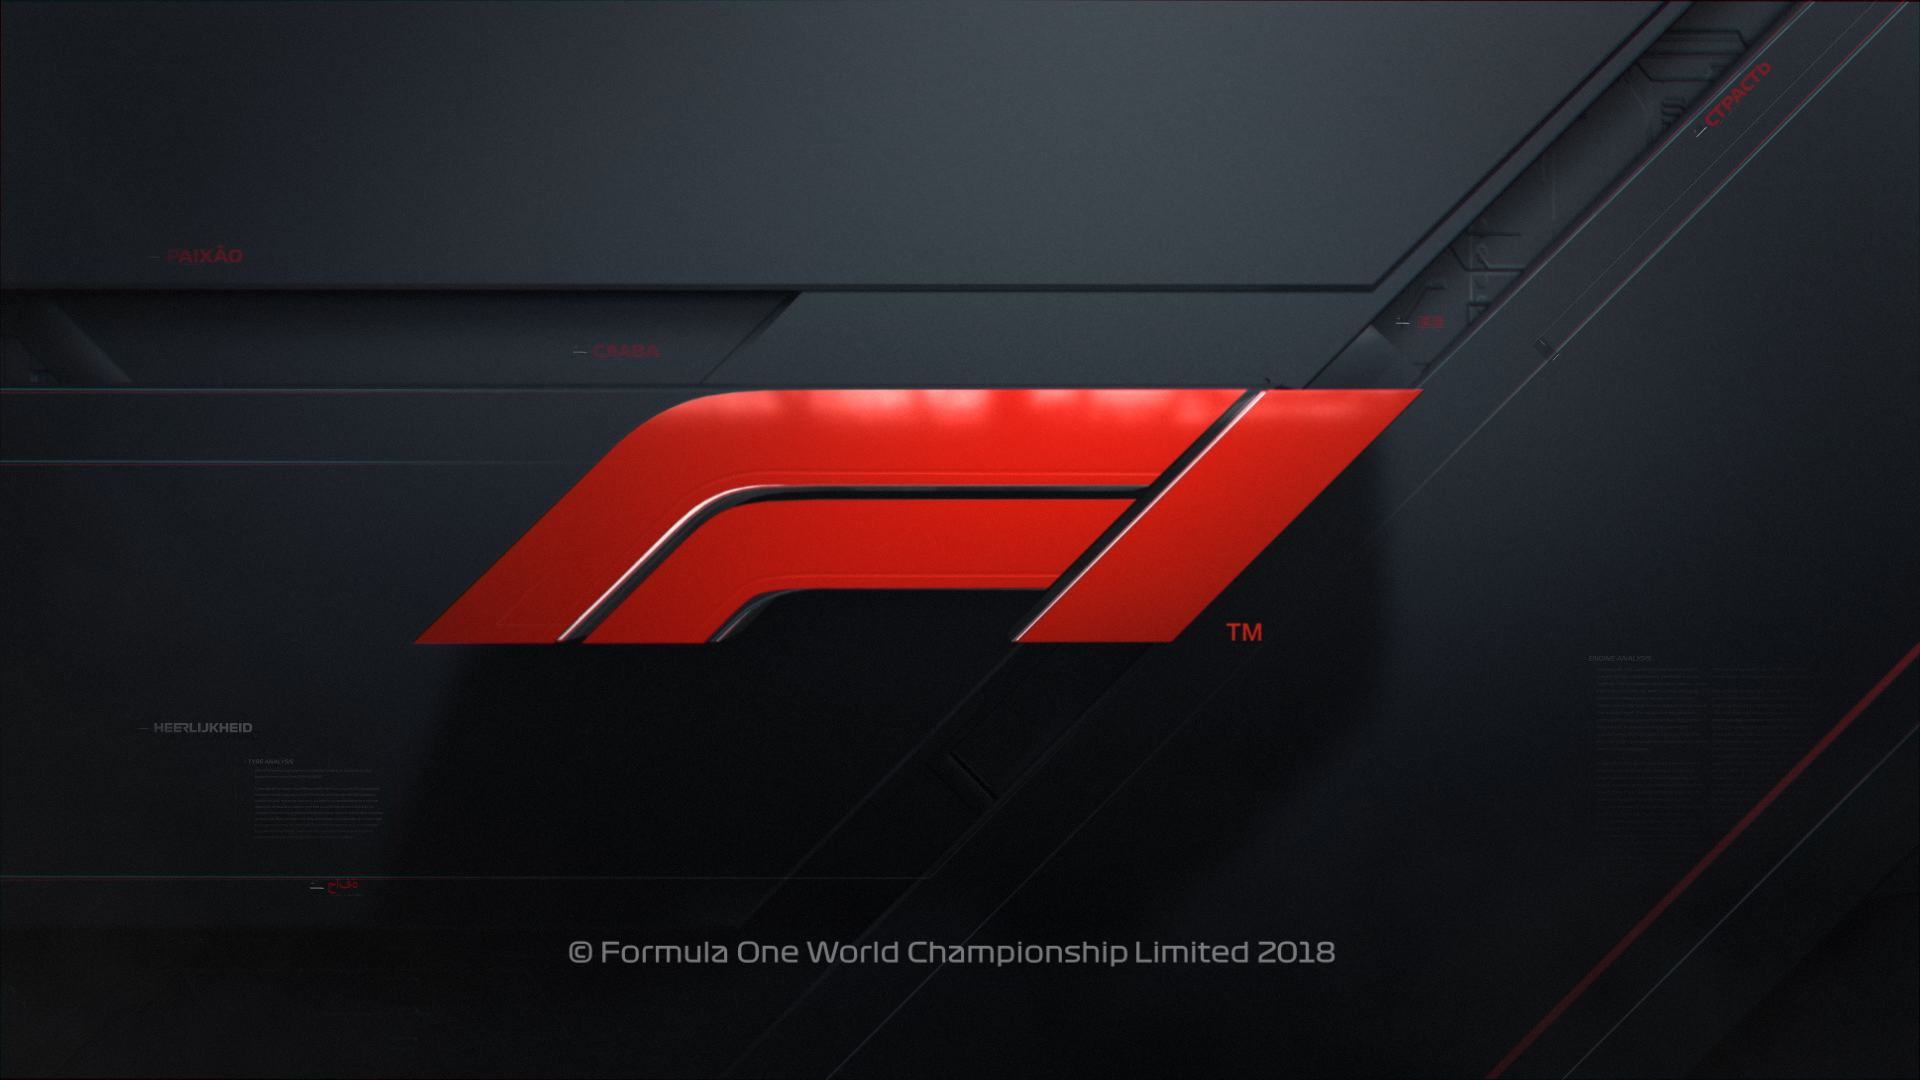

In [1]:
from IPython.display import Image

Image("E:/Medium/2 Learned/Formula 1 Race Data/f1.png")

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

In [3]:
df_circuits = pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/circuits.csv", encoding='latin')
df_circuits.head()

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya     MontmelÌ_   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng   alt  \
0  Australia -37.84970  144.96800  10.0   
1   Malaysia   2.76083  101.73800   NaN   
2    Bahrain  26.03250   50.51060   NaN   
3      Spain  41.57000    2.26111   NaN   
4     Turkey  40.95170   29.40500   NaN   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

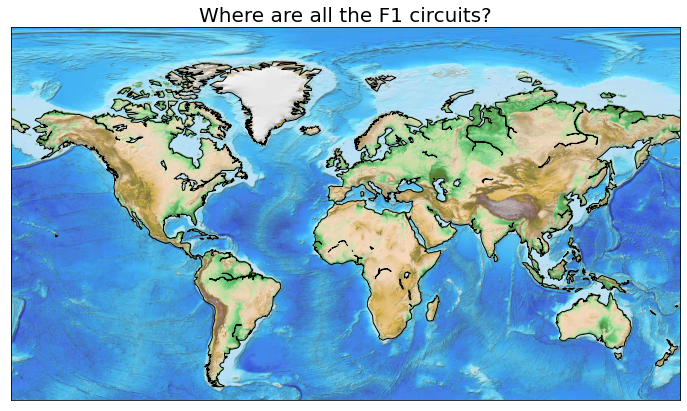

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12,9))
fig.set_facecolor('#FFFFFF')

m = Basemap(projection='mill',
           llcrnrlat = -60,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.etopo(alpha=0.8)
m.drawcoastlines()

sites_lat_y = df_circuits['lat'].tolist()
sites_lon_x = df_circuits['lng'].tolist()

colors = sns.color_palette(None, 76)

#m.scatter(sites_lon_x,sites_lat_y,latlon=True, s=100, c=colors, marker='^', alpha=1, edgecolor='k', linewidth=1, zorder=2)
plt.title('Where are all the F1 circuits?', fontsize=20)

plt.show()

In [5]:
df_country = pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/country-and-continent-codes-list.csv")
df_country.columns

Index(['Continent_Name', 'Continent_Code', 'Country_Name',
       'Two_Letter_Country_Code', 'Three_Letter_Country_Code',
       'Country_Number'],
      dtype='object')

In [6]:
df_country = df_country[df_country.Country_Name.str.contains('|'.join(df_circuits.country))]
df_country = df_country[['Continent_Name', 'Continent_Code', 'Country_Name', 'Three_Letter_Country_Code']]
df_country.rename(columns={'Three_Letter_Country_Code':'Country_Code'}, inplace=True)
df_country.head()

Continent_Name Continent_Code                   Country_Name Country_Code
8          Europe             EU        Azerbaijan, Republic of          AZE
9            Asia             AS        Azerbaijan, Republic of          AZE
10  South America             SA  Argentina, Argentine Republic          ARG
11        Oceania             OC     Australia, Commonwealth of          AUS
12         Europe             EU           Austria, Republic of          AUT

In [7]:
df_country[df_country['Country_Name'].duplicated(keep=False)]

Continent_Name Continent_Code             Country_Name Country_Code
8           Europe             EU  Azerbaijan, Republic of          AZE
9             Asia             AS  Azerbaijan, Republic of          AZE
191         Europe             EU       Russian Federation          RUS
192           Asia             AS       Russian Federation          RUS
234         Europe             EU      Turkey, Republic of          TUR
235           Asia             AS      Turkey, Republic of          TUR

I need to classify Azerbaijian, Russian and Turkey to a particular continent and the choices made are solely based on personally opinion.

In [8]:
df_country.drop(index=[8, 192, 235])
df_country.head()

Continent_Name Continent_Code                   Country_Name Country_Code
8          Europe             EU        Azerbaijan, Republic of          AZE
9            Asia             AS        Azerbaijan, Republic of          AZE
10  South America             SA  Argentina, Argentine Republic          ARG
11        Oceania             OC     Australia, Commonwealth of          AUS
12         Europe             EU           Austria, Republic of          AUT

In [9]:
df_circuits['dummy'] = 1
df_country['dummy'] = 1
df_combined = df_circuits.merge(df_country, on = 'dummy').drop('dummy', axis=1)
df = df_combined[df_combined.apply(lambda x: x.Country_Name.find(x.country), axis=1).ge(0)]
df = df[['circuitId', 'name', 'location', 'country', 'lat', 'lng', 
         'Continent_Name', 'Continent_Code', 'Country_Name', 'Country_Code']]
df.rename(columns={'name':'Circuit_Name'})
df = df.set_index('circuitId')
df.head()

name      location    country       lat  \
circuitId                                                                      
1          Albert Park Grand Prix Circuit     Melbourne  Australia -37.84970   
2            Sepang International Circuit  Kuala Lumpur   Malaysia   2.76083   
3           Bahrain International Circuit        Sakhir    Bahrain  26.03250   
4          Circuit de Barcelona-Catalunya     MontmelÌ_      Spain  41.57000   
5                           Istanbul Park      Istanbul     Turkey  40.95170   

                 lng Continent_Name Continent_Code  \
circuitId                                            
1          144.96800        Oceania             OC   
2          101.73800           Asia             AS   
3           50.51060           Asia             AS   
4            2.26111         Europe             EU   
5           29.40500         Europe             EU   

                         Country_Name Country_Code  
circuitId                                           
1          Australia, Commonwealth of          AUS  
2                            Malaysia          MYS  
3                 Bahrain, Kingdom of          BHR  
4                   Spain, Kingdom of          ESP  
5                 Turkey, Republic of          TUR

In [10]:
df.Continent_Name.value_counts()

Europe           36
Asia             16
North America     6
South America     3
Africa            3
Oceania           2
Name: Continent_Name, dtype: int64

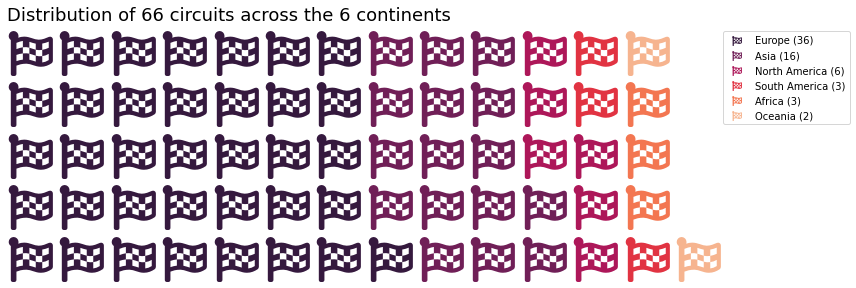

In [11]:
from pywaffle import Waffle
data = df.Continent_Name.value_counts().to_dict()
fig = plt.figure(
    figsize = (12,16),
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=sns.color_palette("rocket",len(data)).as_hex(),
    title={'label': 'Distribution of {} circuits across the {} continents'.format(sum(data.values()), len(data)), 'loc': 'left', 'size':18},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='flag-checkered', icon_size=45, 
    icon_legend=True
)
fig.set_facecolor('#FFFFFF')

Which nationality has the highest number of F1 drivers?

In [12]:
driver = pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/drivers.csv", encoding='latin')
data = driver.nationality.value_counts().to_frame('counts')

url = 'https://raw.githubusercontent.com/Dinuks/country-nationality-list/master/countries.csv'
nationality = pd.read_csv(url)
nationality.head()

num_code alpha_2_code alpha_3_code   en_short_name      nationality
0         4           AF          AFG     Afghanistan           Afghan
1       248           AX          ALA   Åland Islands     Åland Island
2         8           AL          ALB         Albania         Albanian
3        12           DZ          DZA         Algeria         Algerian
4        16           AS          ASM  American Samoa  American Samoan

In [13]:
df_nat = nationality[nationality.nationality.str.contains('|'.join(driver.nationality))]
df_nat = df_nat.drop(index=[4,76,77,78,235,242])
set.difference(set(data.index), set(df_nat.nationality))

{'American-Italian',
 'Argentine-Italian',
 'British',
 'Dutch',
 'East German',
 'Hungarian',
 'Liechtensteiner',
 'Monegasque',
 'New Zealander',
 'Rhodesian'}

In [14]:
df_nat[df_nat.nationality.str.contains('|'.join(set.difference(set(data.index), set(df_nat.nationality))))]

num_code alpha_2_code alpha_3_code  \
100       348           HU          HUN   
156       528           NL          NLD   
234       826           GB          GBR   

                                         en_short_name          nationality  
100                                            Hungary    Hungarian, Magyar  
156                                        Netherlands  Dutch, Netherlandic  
234  United Kingdom of Great Britain and Northern I...          British, UK

In [15]:
nationality[nationality.en_short_name.str.contains('Monaco')]

num_code alpha_2_code alpha_3_code en_short_name          nationality
146       492           MC          MCO        Monaco  Monégasque, Monacan

In [16]:
nationality[nationality.nationality.str.contains('New Zealand|Liechtenstein')]

num_code alpha_2_code alpha_3_code  en_short_name      nationality
127       438           LI          LIE  Liechtenstein    Liechtenstein
158       554           NZ          NZL    New Zealand  New Zealand, NZ

In [17]:
data[data.index.str.contains('New Zealand|Liechtenstein')]

counts
New Zealander         9
Liechtensteiner       1

In [18]:
df_nat = df_nat.append(nationality[nationality.nationality.str.contains('New Zealand|Monégasque|Liechtenstein')])
df_nat['nationality'].replace({'British, UK':'British', 'Dutch, Netherlandic': 'Dutch', 'Hungarian, Magyar': 'Hungarian', 'Monégasque, Monacan':'Monegasque', 'New Zealand, NZ':'New Zealander', 'Liechtenstein':'Liechtensteiner'}, inplace=True)
df_nat[df_nat.nationality.str.contains('New Zealand|Monegasque|Liechtenstein|British|Dutch|Hungarian')]

num_code alpha_2_code alpha_3_code  \
100       348           HU          HUN   
156       528           NL          NLD   
234       826           GB          GBR   
127       438           LI          LIE   
146       492           MC          MCO   
158       554           NZ          NZL   

                                         en_short_name      nationality  
100                                            Hungary        Hungarian  
156                                        Netherlands            Dutch  
234  United Kingdom of Great Britain and Northern I...          British  
127                                      Liechtenstein  Liechtensteiner  
146                                             Monaco       Monegasque  
158                                        New Zealand    New Zealander

In [19]:
df_driver = pd.merge(driver, df_nat, on='nationality', how='left')
df_driver[df_driver['nationality'] == 'Liechtensteiner']

driverId driverRef  number code forename   surname         dob  \
312       313      opel     NaN  NaN    Rikky  von Opel  14/10/1947   

         nationality                                          url  num_code  \
312  Liechtensteiner  http://en.wikipedia.org/wiki/Rikky_von_Opel     438.0   

    alpha_2_code alpha_3_code  en_short_name  
312           LI          LIE  Liechtenstein

In [20]:
dfa = df_driver[~df_driver[['nationality', 'alpha_2_code']].duplicated()][['nationality', 'alpha_2_code']].set_index('nationality')
dfb = driver.nationality.value_counts().to_frame('counts')
data = pd.merge(dfa, dfb, left_index = True, right_index = True)
data = data.sort_values(by='counts', ascending=False)

In [21]:
data[data.alpha_2_code.isna()]

alpha_2_code  counts
Rhodesian                  NaN       4
East German                NaN       3
Argentine-Italian          NaN       1
American-Italian           NaN       1

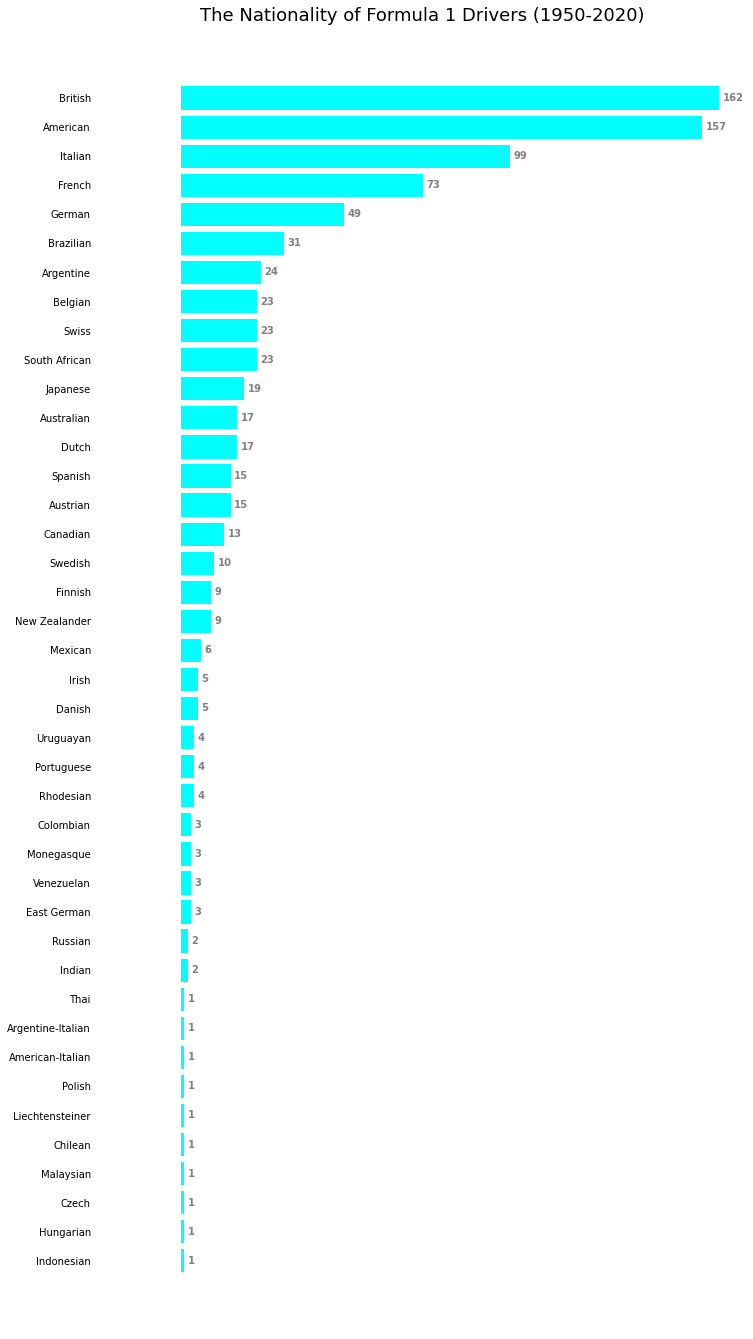

In [22]:
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

fig, ax = plt.subplots(figsize=(12,24))
fig.set_facecolor('#FFFFFF')
ax.set_facecolor('#FFFFFF')

labels = data.alpha_2_code
values = data.counts

ax.barh(data.index, values, color='cyan')
ax.set_xlim(-25,)

# remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# remove x, y ticks, x-axis  
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])

# to show the top value first 
ax.invert_yaxis()

ax.set_title('The Nationality of Formula 1 Drivers (1950-2020)', loc='center', size=18)

for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

def isNaN(string):
    return string != string

def offset_image(x, y, label, ax):
    if(isNaN(label)): 
        response = requests.get(f'https://upload.wikimedia.org/wikipedia/commons/c/c9/Logof1.png')
        img = plt.imread(BytesIO(response.content))
        im = OffsetImage(img, zoom=0.05)
    else: 
        response = requests.get(f'https://www.countryflags.io/{label}/shiny/64.png')        
        img = plt.imread(BytesIO(response.content))
        im = OffsetImage(img, zoom=0.65)
        

plt.subplots_adjust(left=0.15)    
plt.show()

Given the fact that the first F1 world championship race took place in the United Kingdom. It is not surprising to see so many British drivers. What surprises me is that, American comes second though.

How many races/Grand Prix in each season?

In [23]:
laptimes = pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/lap_times.csv")
races = pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/races.csv")
print(laptimes.columns)
print(races.columns)
print(driver.columns)
print(df_circuits.columns)

Index(['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], dtype='object')
Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url'], dtype='object')
Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')
Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url', 'dummy'],
      dtype='object')


In [24]:
df_combined = pd.merge(laptimes, races, on='raceId', how='left')
df_combined.columns

Index(['raceId', 'driverId', 'lap', 'position', 'time_x', 'milliseconds',
       'year', 'round', 'circuitId', 'name', 'date', 'time_y', 'url'],
      dtype='object')

In [25]:
df_combined = df_combined[['raceId', 'driverId', 'time_x', 'milliseconds',
       'year', 'round', 'circuitId', 'name', 'date']]
df_combined.rename(columns={'time_x':'lap_time', 'name':'circuit_name'}, inplace=True)
df_combined = pd.merge(df_combined, driver, on='driverId', how='left')
df_combined = pd.merge(df_combined, df_circuits, on='circuitId', how='left')
df_combined.columns

Index(['raceId', 'driverId', 'lap_time', 'milliseconds', 'year', 'round',
       'circuitId', 'circuit_name', 'date', 'driverRef', 'number', 'code',
       'forename', 'surname', 'dob', 'nationality', 'url_x', 'circuitRef',
       'name', 'location', 'country', 'lat', 'lng', 'alt', 'url_y', 'dummy'],
      dtype='object')

In [26]:
df_combined = df_combined[['raceId', 'driverId', 'lap_time', 'milliseconds', 'year', 'round',
       'circuitId', 'circuit_name', 'date', 'driverRef', 'number', 'code',
       'forename', 'surname', 'dob', 'nationality', 'circuitRef', 'location', 'country']]
df_combined.head(3)

raceId  driverId  lap_time  milliseconds    year  round  circuitId  \
0     841        20  1:38.109         98109  2011.0    1.0        1.0   
1     841        20  1:33.006         93006  2011.0    1.0        1.0   
2     841        20  1:32.713         92713  2011.0    1.0        1.0   

            circuit_name        date driverRef  number code   forename  \
0  Australian Grand Prix  2011-03-27    vettel     5.0  VET  Sebastian   
1  Australian Grand Prix  2011-03-27    vettel     5.0  VET  Sebastian   
2  Australian Grand Prix  2011-03-27    vettel     5.0  VET  Sebastian   

  surname         dob nationality   circuitRef   location    country  
0  Vettel  03/07/1987      German  albert_park  Melbourne  Australia  
1  Vettel  03/07/1987      German  albert_park  Melbourne  Australia  
2  Vettel  03/07/1987      German  albert_park  Melbourne  Australia

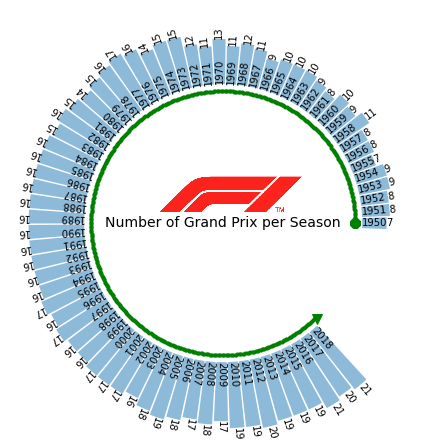

In [27]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

rounds = races.groupby('year').round.max().reset_index()['round'].tolist()
years = races.groupby('year').round.max().reset_index()['year'].tolist()

N = len(rounds)
arrRounds = np.array(rounds)

theta=np.arange(0,1.75*np.pi,1.75*np.pi/N)
width = (1.75*np.pi)/N *0.9
bottom = 40

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
fig.set_facecolor('#FFFFFF')
bars = ax.bar(theta, arrRounds, width=width, bottom=bottom, alpha=0.5)
plt.axis('off')

rotations = np.rad2deg(theta)
for x, bar, rotation, counts in zip(theta, bars, rotations, rounds):
    lab = ax.text(x,bottom+bar.get_height(), counts, 
             ha='left', va='center', rotation=rotation, rotation_mode="anchor") 
    
for x, bar, rotation, labels in zip(theta, bars, rotations, years):
    lab = ax.text(x,bottom, labels, 
             ha='left', va='center', rotation=rotation, rotation_mode="anchor") 

rads = np.arange(0, 1.75*np.pi, 0.01) 
for rad in rads: 
    plt.polar(rad, bottom-2, 'g.') 

ax.plot(theta[0], bottom-2, '8', color='g', markersize=10)
ax.plot(rads[len(rads)-1], bottom-1.5, 'v', color='g', markersize=10)

response = requests.get(f'https://upload.wikimedia.org/wikipedia/commons/c/c9/Logof1.png')
img = plt.imread(BytesIO(response.content))
im = OffsetImage(img, zoom=0.15)
im.image.axes = plt.gca()
ab = AnnotationBbox(im, (0, 15), xybox=(-45, 30), frameon=False,
                    xycoords='data', boxcoords="offset points", pad=0)
plt.gca().add_artist(ab)

ax.text(0, 0, 'Number of Grand Prix per Season', fontsize=14,
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

We have 70 seasons in total so the typical barplot looks very congested. Then I've decided to use circular barplot instead.

We can see that the total number of races per season is pretty consistent over the years. This year due to Covid19 pandemic, they only managed to arrange for 17 races as compared to 21 races in the previous recent years

Who is the fastest driver in the Grid?

In [28]:
data = pd.merge(df_combined.groupby(['circuit_name','date']).lap_time.min().to_frame().reset_index(), df_combined[['circuit_name','date','lap_time', 'driverRef','code']], on=['circuit_name','date','lap_time'], how='left')
data = data.sort_values(by='date', ascending = False)
data.head(5)

circuit_name        date  lap_time driverRef code
9        Abu Dhabi Grand Prix  2018-11-25  1:40.867    vettel  VET
107      Brazilian Grand Prix  2018-11-11  1:10.540    bottas  BOT
319        Mexican Grand Prix  2018-10-28  1:18.741    bottas  BOT
415  United States Grand Prix  2018-10-21  1:37.392  hamilton  HAM
290       Japanese Grand Prix  2018-10-07  1:32.318    vettel  VET

In [29]:
data['year'] = pd.DatetimeIndex(data.date).year
data['counts'] = 1
data = data.groupby(['year', 'code', 'driverRef']).counts.count().to_frame().reset_index().sort_values(by='year', ascending=False)
data.head(3)

year code       driverRef  counts
145  2018  VET          vettel       3
144  2018  VER  max_verstappen       2
143  2018  RIC       ricciardo       4

In [30]:
#fastest = data.loc[data.groupby(['year'])['occ'].idxmax()]
fastest = pd.merge(data, data.groupby(['year'])['counts'].max().to_frame(name='max').reset_index(), on='year', how='left')
fastest = fastest[fastest['counts'] == fastest['max']][['year','code','driverRef','counts']]
fastest.driverRef = fastest.driverRef.str.capitalize()

# Calculate the percentage of fastest lap per season 
fastest = pd.merge(fastest, df_combined.groupby('year')['round'].max().reset_index(), on='year', how='left')
fastest['percent'] = np.array(fastest['counts'])/np.array(fastest['round'])*100
fastest

year code           driverRef  counts  round    percent
0   2018  BOT              Bottas       7   21.0  33.333333
1   2017  HAM            Hamilton       7   20.0  35.000000
2   2016  ROS             Rosberg       6   21.0  28.571429
3   2015  HAM            Hamilton       7   19.0  36.842105
4   2014  HAM            Hamilton       6   19.0  31.578947
5   2013  VET              Vettel       7   19.0  36.842105
6   2012  VET              Vettel       6   20.0  30.000000
7   2011  WEB              Webber       7   19.0  36.842105
8   2010  ALO              Alonso       5   19.0  26.315789
9   2009  VET              Vettel       3   17.0  17.647059
10  2009  WEB              Webber       3   17.0  17.647059
11  2008  RAI           Raikkonen      10   18.0  55.555556
12  2007  MAS               Massa       6   17.0  35.294118
13  2006  MSC  Michael_schumacher       7   18.0  38.888889
14  2005  RAI           Raikkonen       9   19.0  47.368421
15  2004  MSC  Michael_schumacher       9   18.0  50.000000
16  2003  MSC  Michael_schumacher       5   16.0  31.250000
17  2002  MSC  Michael_schumacher       7   17.0  41.176471
18  2001  SCH     Ralf_schumacher       4   17.0  23.529412
19  2001  MON             Montoya       4   17.0  23.529412
20  2000  COU           Coulthard       3   17.0  17.647059
21  2000  BAR         Barrichello       3   17.0  17.647059
22  1999  MSC  Michael_schumacher       5   16.0  31.250000
23  1998  MSC  Michael_schumacher       5   16.0  31.250000
24  1997  MSC  Michael_schumacher       3   17.0  17.647059
25  1997  VIL          Villeneuve       3   17.0  17.647059
26  1996  VIL          Villeneuve       6   16.0  37.500000

In [31]:
fastest.iloc[[22,23,24],fastest.columns.get_loc('code')] = ['HAK','HAK','HAK']
fastest.iloc[26,fastest.columns.get_loc('code')] = 'FRE'

# drop 2020 
fastest = fastest.drop(index=0)
fastest = fastest.sort_values(by='year', ascending=True)
fastest['year'] = fastest['year'].astype(str)
fastest = fastest.reset_index(drop=True)
fastest

year code           driverRef  counts  round    percent
0   1996  FRE          Villeneuve       6   16.0  37.500000
1   1997  HAK  Michael_schumacher       3   17.0  17.647059
2   1997  VIL          Villeneuve       3   17.0  17.647059
3   1998  HAK  Michael_schumacher       5   16.0  31.250000
4   1999  HAK  Michael_schumacher       5   16.0  31.250000
5   2000  BAR         Barrichello       3   17.0  17.647059
6   2000  COU           Coulthard       3   17.0  17.647059
7   2001  MON             Montoya       4   17.0  23.529412
8   2001  SCH     Ralf_schumacher       4   17.0  23.529412
9   2002  MSC  Michael_schumacher       7   17.0  41.176471
10  2003  MSC  Michael_schumacher       5   16.0  31.250000
11  2004  MSC  Michael_schumacher       9   18.0  50.000000
12  2005  RAI           Raikkonen       9   19.0  47.368421
13  2006  MSC  Michael_schumacher       7   18.0  38.888889
14  2007  MAS               Massa       6   17.0  35.294118
15  2008  RAI           Raikkonen      10   18.0  55.555556
16  2009  WEB              Webber       3   17.0  17.647059
17  2009  VET              Vettel       3   17.0  17.647059
18  2010  ALO              Alonso       5   19.0  26.315789
19  2011  WEB              Webber       7   19.0  36.842105
20  2012  VET              Vettel       6   20.0  30.000000
21  2013  VET              Vettel       7   19.0  36.842105
22  2014  HAM            Hamilton       6   19.0  31.578947
23  2015  HAM            Hamilton       7   19.0  36.842105
24  2016  ROS             Rosberg       6   21.0  28.571429
25  2017  HAM            Hamilton       7   20.0  35.000000

In [32]:
fastest[fastest['year'].duplicated(keep=False)]

year code           driverRef  counts  round    percent
1   1997  HAK  Michael_schumacher       3   17.0  17.647059
2   1997  VIL          Villeneuve       3   17.0  17.647059
5   2000  BAR         Barrichello       3   17.0  17.647059
6   2000  COU           Coulthard       3   17.0  17.647059
7   2001  MON             Montoya       4   17.0  23.529412
8   2001  SCH     Ralf_schumacher       4   17.0  23.529412
16  2009  WEB              Webber       3   17.0  17.647059
17  2009  VET              Vettel       3   17.0  17.647059

In [33]:
# concatenate code, driver name from duplicated rows 
data_code = fastest[fastest['year'].duplicated(keep=False)][['year','code']].groupby('year').transform(lambda x: ', '.join(x))
data_ref = fastest[fastest['year'].duplicated(keep=False)][['year','driverRef']].groupby('year').transform(lambda x: ', '.join(x))
data_combined = pd.merge(data_code, data_ref, left_index=True, right_index=True, how='outer')
data_combined

code                       driverRef
1   HAK, VIL  Michael_schumacher, Villeneuve
2   HAK, VIL  Michael_schumacher, Villeneuve
5   BAR, COU          Barrichello, Coulthard
6   BAR, COU          Barrichello, Coulthard
7   MON, SCH        Montoya, Ralf_schumacher
8   MON, SCH        Montoya, Ralf_schumacher
16  WEB, VET                  Webber, Vettel
17  WEB, VET                  Webber, Vettel

In [34]:
pd.merge(fastest[fastest['year'].duplicated(keep=False)]['year'], data_combined, left_index=True, right_index=True, how='outer')

year      code                       driverRef
1   1997  HAK, VIL  Michael_schumacher, Villeneuve
2   1997  HAK, VIL  Michael_schumacher, Villeneuve
5   2000  BAR, COU          Barrichello, Coulthard
6   2000  BAR, COU          Barrichello, Coulthard
7   2001  MON, SCH        Montoya, Ralf_schumacher
8   2001  MON, SCH        Montoya, Ralf_schumacher
16  2009  WEB, VET                  Webber, Vettel
17  2009  WEB, VET                  Webber, Vettel

In [35]:
fastest.loc[fastest['year'].duplicated(keep=False), ['year', 'code','driverRef']]

year code           driverRef
1   1997  HAK  Michael_schumacher
2   1997  VIL          Villeneuve
5   2000  BAR         Barrichello
6   2000  COU           Coulthard
7   2001  MON             Montoya
8   2001  SCH     Ralf_schumacher
16  2009  WEB              Webber
17  2009  VET              Vettel

In [36]:
# replace the subset of fastest dataframe with the updated values 
fastest.loc[fastest['year'].duplicated(keep=False), ['year', 'code','driverRef']] = pd.merge(fastest[fastest['year'].duplicated(keep=False)]['year'], data_combined, left_index=True, right_index=True, how='outer').values
fastest

year      code                       driverRef  counts  round    percent
0   1996       FRE                      Villeneuve       6   16.0  37.500000
1   1997  HAK, VIL  Michael_schumacher, Villeneuve       3   17.0  17.647059
2   1997  HAK, VIL  Michael_schumacher, Villeneuve       3   17.0  17.647059
3   1998       HAK              Michael_schumacher       5   16.0  31.250000
4   1999       HAK              Michael_schumacher       5   16.0  31.250000
5   2000  BAR, COU          Barrichello, Coulthard       3   17.0  17.647059
6   2000  BAR, COU          Barrichello, Coulthard       3   17.0  17.647059
7   2001  MON, SCH        Montoya, Ralf_schumacher       4   17.0  23.529412
8   2001  MON, SCH        Montoya, Ralf_schumacher       4   17.0  23.529412
9   2002       MSC              Michael_schumacher       7   17.0  41.176471
10  2003       MSC              Michael_schumacher       5   16.0  31.250000
11  2004       MSC              Michael_schumacher       9   18.0  50.000000
12  2005       RAI                       Raikkonen       9   19.0  47.368421
13  2006       MSC              Michael_schumacher       7   18.0  38.888889
14  2007       MAS                           Massa       6   17.0  35.294118
15  2008       RAI                       Raikkonen      10   18.0  55.555556
16  2009  WEB, VET                  Webber, Vettel       3   17.0  17.647059
17  2009  WEB, VET                  Webber, Vettel       3   17.0  17.647059
18  2010       ALO                          Alonso       5   19.0  26.315789
19  2011       WEB                          Webber       7   19.0  36.842105
20  2012       VET                          Vettel       6   20.0  30.000000
21  2013       VET                          Vettel       7   19.0  36.842105
22  2014       HAM                        Hamilton       6   19.0  31.578947
23  2015       HAM                        Hamilton       7   19.0  36.842105
24  2016       ROS                         Rosberg       6   21.0  28.571429
25  2017       HAM                        Hamilton       7   20.0  35.000000

In [37]:
fastest = fastest[~fastest.duplicated()]
fastest

year      code                       driverRef  counts  round    percent
0   1996       FRE                      Villeneuve       6   16.0  37.500000
1   1997  HAK, VIL  Michael_schumacher, Villeneuve       3   17.0  17.647059
3   1998       HAK              Michael_schumacher       5   16.0  31.250000
4   1999       HAK              Michael_schumacher       5   16.0  31.250000
5   2000  BAR, COU          Barrichello, Coulthard       3   17.0  17.647059
7   2001  MON, SCH        Montoya, Ralf_schumacher       4   17.0  23.529412
9   2002       MSC              Michael_schumacher       7   17.0  41.176471
10  2003       MSC              Michael_schumacher       5   16.0  31.250000
11  2004       MSC              Michael_schumacher       9   18.0  50.000000
12  2005       RAI                       Raikkonen       9   19.0  47.368421
13  2006       MSC              Michael_schumacher       7   18.0  38.888889
14  2007       MAS                           Massa       6   17.0  35.294118
15  2008       RAI                       Raikkonen      10   18.0  55.555556
16  2009  WEB, VET                  Webber, Vettel       3   17.0  17.647059
18  2010       ALO                          Alonso       5   19.0  26.315789
19  2011       WEB                          Webber       7   19.0  36.842105
20  2012       VET                          Vettel       6   20.0  30.000000
21  2013       VET                          Vettel       7   19.0  36.842105
22  2014       HAM                        Hamilton       6   19.0  31.578947
23  2015       HAM                        Hamilton       7   19.0  36.842105
24  2016       ROS                         Rosberg       6   21.0  28.571429
25  2017       HAM                        Hamilton       7   20.0  35.000000

In [38]:
fastest[fastest['code'] == 'HAM']

year code driverRef  counts  round    percent
22  2014  HAM  Hamilton       6   19.0  31.578947
23  2015  HAM  Hamilton       7   19.0  36.842105
25  2017  HAM  Hamilton       7   20.0  35.000000

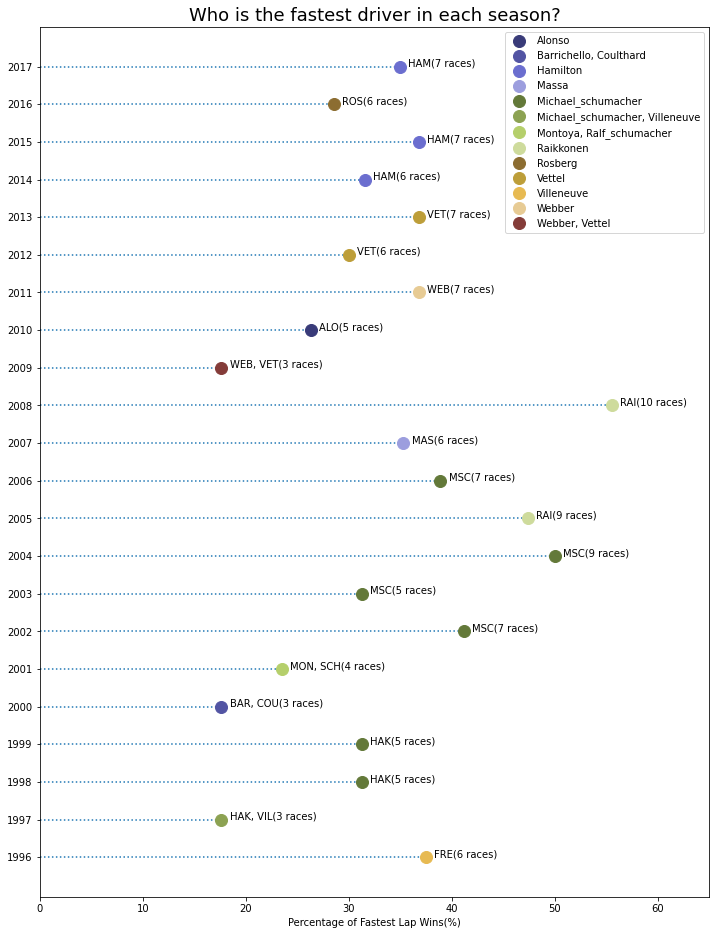

In [39]:
from bokeh.palettes import Category20b

fig, ax = plt.subplots(figsize=(12,16))
fig.set_facecolor('#FFFFFF')
ax.set_facecolor('#FFFFFF')

ax.hlines(fastest.year, xmin=0, xmax=fastest.percent, linestyle='dotted')

groups = fastest[['year','percent','driverRef']].groupby('driverRef')
colors = Category20b[len(fastest.code.unique().tolist())]

for (name, group), color in zip(groups, colors):
    ax.plot(group.percent, group.year, marker='o', color=color, linestyle='', ms=12, label=name)
ax.set_xlim(0,65)
ax.legend()

for x,y, label, count in zip(fastest.percent, fastest.year, fastest.code, fastest.counts):
    ax.annotate(label+'({} races)'.format(count), xy=(x+0.8,y), textcoords='data')
    #ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Percentage of Fastest Lap Wins(%)')
plt.title('Who is the fastest driver in each season?', fontsize=18)

plt.show()

As it turned out, Kami Raikkonen had won the fastest lap more than half of the time in season 2008 and in 2005, he also won the fastest lap 9 times out of 19 races with 47.37% wining margin. Lewis Hamilton, by comparison, did not have such a big winning margin. When he was the fastest driver of the season, his winning percentage was less than 40%. However, just as Michael Schumacher, he has been the fastest driver in the Grid for 4 times and most likely that he will break the record after this season ends.

In [40]:
# Load in the datasets
result=pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/results.csv")
race  =pd.read_csv("E:/Medium/2 Learned/Formula 1 Race Data/races.csv")

In [41]:
# Merge all three datasets and filter out races before 2010 
m1=pd.merge(result,driver,on='driverId')
m2=pd.merge(m1,race,on='raceId')
result_v2=m2[m2.year>2009]

In [42]:
# Create driver name field from forename and surname
result_v2["driver"] = result_v2["forename"] + " " + result_v2["surname"]

In [43]:
# Aggregate total points and average points per race
avg_pts   = result_v2[['driver','points']].groupby("driver").mean()
total_pts = result_v2[['driver','points']].groupby("driver").sum()

In [44]:
# Count number of races for each driver and filter out drivers with less than 100 races
n=result_v2[['driver','raceId']].groupby("driver").count()
num_races=n[n.raceId>100]

In [45]:
# Merge the above summary tables and reset index to create column for driver name
d =pd.merge(avg_pts,total_pts,on='driver')
md=pd.merge(d,num_races,on='driver')
md = md.reset_index()
md.iloc[7,3]=180 #data correction
md.iloc[6,3]=125 #data correction

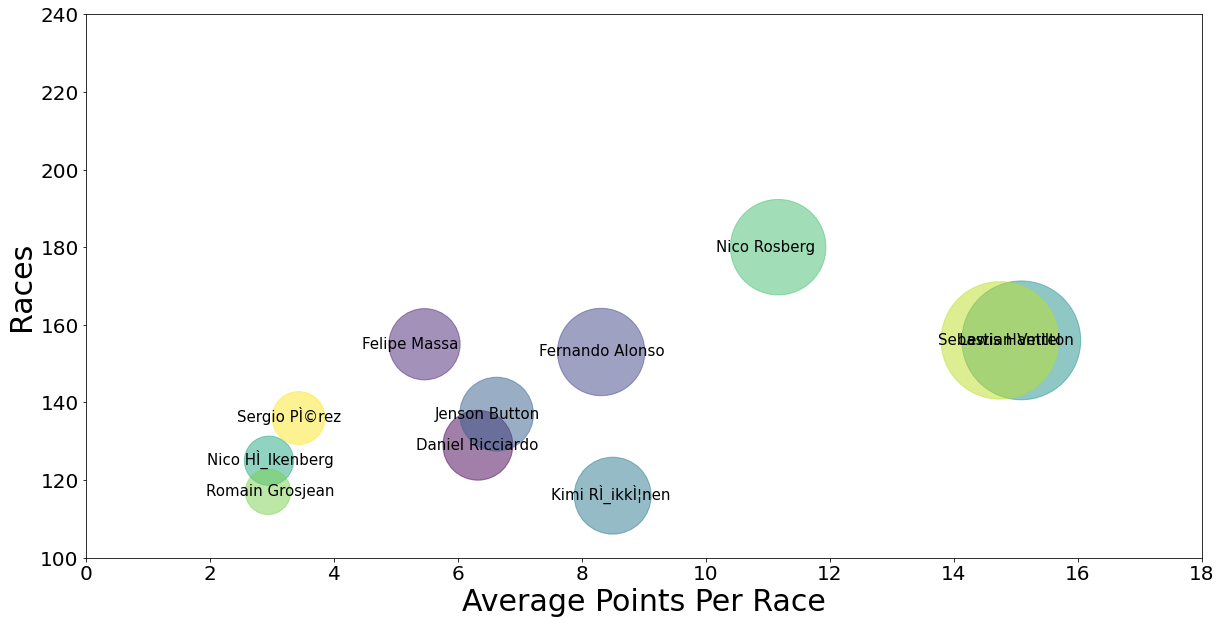

In [46]:
# Create bubble chart with size of the bubble showing total points scored in the decade

plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=30)    # legend fontsize
plt.rc('figure', titlesize=30)   # fontsize of the figure title

plt.figure(figsize=(20,10))
plt.scatter(md.points_x,md.raceId,s=md.points_y*6,alpha=0.5,c=md.index.to_series())
plt.xlim(0,18)
plt.ylim(100,240)

plt.xlabel("Average Points Per Race")
plt.ylabel("Races")

for x,y,z in zip(md.points_x,md.raceId,md.driver):
    plt.annotate(z,xy=(x-1,y-1)) 